--- Model Training Script Started ---
Dataset loaded successfully.

--- Correlation Analysis ---
Correlation heatmap saved to correlation_heatmap.png

--- Descriptive Analysis ---
             date   quarter department        day         team  \
count        1197      1197       1197       1197  1197.000000   
unique         59         5          3          6          NaN   
top     1/31/2015  Quarter1     sweing  Wednesday          NaN   
freq           24       360        691        208          NaN   
mean          NaN       NaN        NaN        NaN     6.426901   
std           NaN       NaN        NaN        NaN     3.463963   
min           NaN       NaN        NaN        NaN     1.000000   
25%           NaN       NaN        NaN        NaN     3.000000   
50%           NaN       NaN        NaN        NaN     6.000000   
75%           NaN       NaN        NaN        NaN     9.000000   
max           NaN       NaN        NaN        NaN    12.000000   

        targeted_productivi

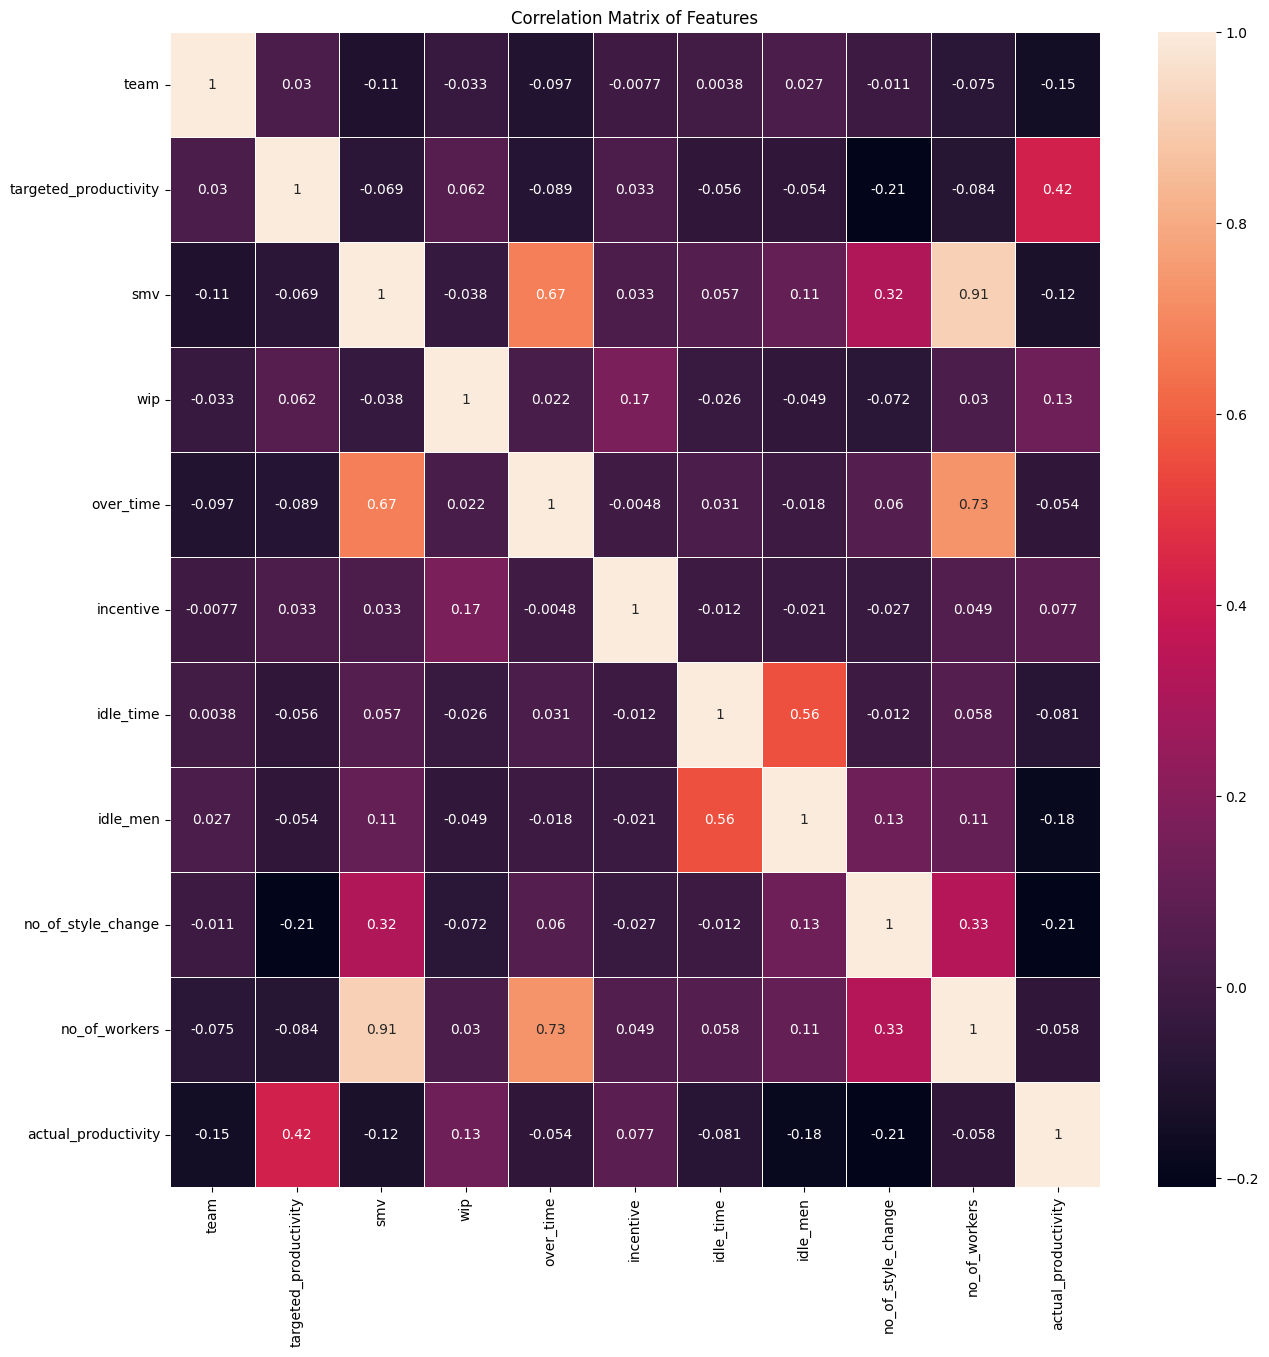

In [4]:
# --- START OF COLAB CODE ---

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder # Using modern, standard library
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pickle
import warnings

warnings.filterwarnings('ignore')

print("--- Model Training Script Started ---")

# --- 1. Data Collection & Analysis ---
# This will work because you uploaded the file in Step 3
data = pd.read_csv("garments_worker_productivity.csv")
print("Dataset loaded successfully.")

# Correlation Analysis (as per instructions)
print("\n--- Correlation Analysis ---")
corrMatrix = data.corr(numeric_only=True)
plt.figure(figsize=(15, 15))
sns.heatmap(corrMatrix, annot=True, linewidths=.5)
plt.title("Correlation Matrix of Features")
plt.savefig("correlation_heatmap.png")
print("Correlation heatmap saved to correlation_heatmap.png")

# Descriptive Analysis (as per instructions)
print("\n--- Descriptive Analysis ---")
print(data.describe(include='all'))


# --- 2. Data Pre-processing ---
print("\n--- Data Pre-processing ---")

# Checking for null values
print("\nNull Values Check:")
print(data.isnull().sum())

# Dropping 'wip' column (as per instructions)
data.drop(['wip'], axis=1, inplace=True)
print("'wip' column dropped.")

# Handling Date & department column
data['date'] = pd.to_datetime(data['date'])
data['month'] = data['date'].dt.month
data.drop(['date'], axis=1, inplace=True)
print("'date' column converted to 'month' and dropped.")

# Handling 'department' column (as per screenshot)
data['department'] = data['department'].str.strip()
print("'department' column whitespace stripped, merging categories.")
print(data['department'].value_counts())

# Handling Categorical Values
cat_cols = ['quarter', 'department', 'day']
encoder = OrdinalEncoder()
data[cat_cols] = encoder.fit_transform(data[cat_cols])
print("Categorical columns encoded.")

# --- 3. Splitting data into train and test ---
print("\n--- Splitting Data ---")
X = data.drop(['actual_productivity'], axis=1)
y = data['actual_productivity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Data split into {len(X_train)} train and {len(X_test)} test samples.")


# --- 4. Model Building ---
print("\n--- Model Building & Evaluation ---")

# Model 1: Linear Regression
print("\nTraining Linear Regression...")
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)
pred_lr = model_lr.predict(X_test)
print("Linear Regression Metrics:")
print(f"  R2 Score: {r2_score(y_test, pred_lr)}")

# Model 2: Random Forest
print("\nTraining Random Forest...")
model_rf = RandomForestRegressor(n_estimators=200, max_depth=5, random_state=42)
model_rf.fit(X_train, y_train)
pred_rf = model_rf.predict(X_test)
print("Random Forest Metrics:")
print(f"  R2 Score: {r2_score(y_test, pred_rf)}")

# Model 3: XGBoost
print("\nTraining XGBoost...")
model_xgb = xgb.XGBRegressor(objective='reg:squarederror',
                             n_estimators=200,
                             max_depth=5,
                             learning_rate=0.1,
                             random_state=42)
model_xgb.fit(X_train, y_train)
pred_xgb = model_xgb.predict(X_test)
print("XGBoost Metrics:")
print(f"  R2 Score: {r2_score(y_test, pred_xgb)}")


# --- 5. Save the Best Model ---
print("\n--- Saving Best Model ---")
# As per instructions, XGBoost is the best model.
pickle.dump(model_xgb, open("gwp.pkl", "wb"))
print("XGBoost model saved as 'gwp.pkl'")

pickle.dump(encoder, open("mcle.pkl", "wb"))
print("OrdinalEncoder saved as 'mcle.pkl'")

print("\n--- Model Training Script Finished ---")

# --- END OF COLAB CODE ---